In [117]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [118]:
os.getcwd()

'/rapids/notebooks'

In [119]:
data = pd.read_csv('Crime_Clean.csv')

In [120]:
data.head()

,Unnamed: 0,Incident ID,City,Police District Name,Block,Crime Name1,Crime Name2,Crime Name3,Victims,Place,...,Total Laborforce,Total Unemployed,Start_Date_Time,Location,Longitude,Latitude,High School %,Bachelors %,Public Transportation %,Unemployed %
0,50,201268391,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,1067.0,31.0,12/06/2019 09:16:00 PM,"(39.2006, -77.1996)",-77.199620,39.200626,0.083714,0.270167,0.049515,0.029053
1,51,201234989,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,1,Residence - Single Family,...,1067.0,31.0,04/13/2019 02:00:00 AM,"(39.1977, -77.1997)",-77.199669,39.197675,0.083714,0.270167,0.049515,0.029053
2,52,201281727,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Yard,...,1067.0,31.0,03/13/2020 09:09:00 AM,"(39.2081, -77.1748)",-77.174806,39.208137,0.083714,0.270167,0.049515,0.029053
3,53,201265326,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,1067.0,31.0,11/15/2019 04:33:00 PM,"(39.2025, -77.1848)",-77.184766,39.202456,0.083714,0.270167,0.049515,0.029053
4,54,201090622,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Street - Other,...,1067.0,31.0,07/22/2016 10:27:00 PM,"(39.205, -77.1643)",-77.164342,39.204973,0.083714,0.270167,0.049515,0.029053


In [121]:
len(data)

235368

In [122]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                165
Crime Name2                165
Crime Name3                165
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
High School %                0
Bachelors %                  0
Public Transportation %      0
Unemployed %                 0
dtype: int64

In [123]:
data = data.drop('City',1)

In [124]:
data = data[~data['Crime Name1'].isnull()]

In [125]:
data.isnull().sum()

Unnamed: 0                 0
Incident ID                0
Police District Name       0
Block                      0
Crime Name1                0
Crime Name2                0
Crime Name3                0
Victims                    0
Place                      0
Pop                        0
Income                     0
Age                        0
Educational Attainment     0
Bachelors                  0
High School                0
Means of Transportation    0
Public Transportation      0
Total Laborforce           0
Total Unemployed           0
Start_Date_Time            0
Location                   0
Longitude                  0
Latitude                   0
High School %              0
Bachelors %                0
Public Transportation %    0
Unemployed %               0
dtype: int64

In [126]:
data = data.drop(['Unnamed: 0','Educational Attainment','Bachelors','High School','Means of Transportation','Public Transportation',
          'Total Laborforce','Total Unemployed','Longitude','Latitude','Crime Name1','Crime Name2'],1)

In [127]:
data.columns

Index(['Incident ID', 'Police District Name', 'Block', 'Crime Name3',
       'Victims', 'Place', 'Pop', 'Income', 'Age', 'Start_Date_Time',
       'Location', 'High School %', 'Bachelors %', 'Public Transportation %',
       'Unemployed %'],
      dtype='object')

In [128]:
data.shape

(235203, 15)

In [129]:
data = pd.get_dummies(data, prefix = ['Place','Police District Name'], columns = ['Place','Police District Name'])

In [130]:
data.shape

(235203, 105)

In [131]:
data['Crime Name3'].value_counts()

LARCENY - FROM AUTO                        20699
DRUGS - MARIJUANA - POSSESS                14408
POLICE INFORMATION                         13417
ASSAULT - 2ND DEGREE                       12724
LARCENY - SHOPLIFTING                      12145
                                           ...  
COMPOUNDING CRIME                              1
NON SUPPORT                                    1
DAMAGE PROPERTY - PUBLIC-WITH EXPLOSIVE        1
WEAPON - SELLING                               1
OBSTRUCT POLICE - WITNESS - DECEIVING          1
Name: Crime Name3, Length: 326, dtype: int64

In [132]:
classes = data['Crime Name3'].value_counts().loc[lambda x: x > 1000]

top_classes = list(classes.index.values)

data = data[data['Crime Name3'].isin(top_classes)]

In [133]:
data['Crime Name3'].value_counts()

LARCENY - FROM AUTO                           20699
DRUGS - MARIJUANA - POSSESS                   14408
POLICE INFORMATION                            13417
ASSAULT - 2ND DEGREE                          12724
LARCENY - SHOPLIFTING                         12145
DRIVING UNDER THE INFLUENCE LIQUOR            11747
LARCENY (DESCRIBE OFFENSE)                     9687
DAMAGE PROPERTY - PRIVATE                      9123
MENTAL ILLNESS - EMERGENCY PETITION            8595
LARCENY - FROM BLDG                            8310
LOST PROPERTY                                  8237
IDENTITY THEFT                                 4896
SUDDEN DEATH                                   4417
LIQUOR - POSSESS                               4411
PUBLIC PEACE - DISORDERLY CONDUCT              4318
AUTO THEFT - VEHICLE THEFT                     4149
LARCENY - AUTO PARTS                           4056
MISSING PERSON                                 3589
TRESPASSING                                    3378
FRAUD - ILLE

In [134]:
top_classes = sorted(top_classes)
top_classes

['ALL OTHER OFFENSES',
 'ASSAULT - 2ND DEGREE',
 'ASSAULT - SIMPLE',
 'AUTO THEFT - VEHICLE THEFT',
 'BURGLARY - FORCED ENTRY-NONRESIDENTIAL',
 'BURGLARY - FORCED ENTRY-RESIDENTIAL',
 'BURGLARY - NO FORCED ENTRY-RESIDENTIAL',
 'DAMAGE PROPERTY (DESCRIBE OFFENSE)',
 'DAMAGE PROPERTY - BUSINESS',
 'DAMAGE PROPERTY - PRIVATE',
 'DRIVING UNDER THE INFLUENCE LIQUOR',
 'DRUGS - COCAINE - POSSESS',
 'DRUGS - MARIJUANA - POSSESS',
 'DRUGS - NARCOTIC EQUIP - POSSESS',
 'FORGERY OF CHECKS',
 'FRAUD (DESCRIBE OFFENSE)',
 'FRAUD - CONFIDENCE GAME',
 'FRAUD - ILLEGAL USE CREDIT CARDS',
 'FRAUD - IMPERSONATION',
 'IDENTITY THEFT',
 'JUVENILE - RUNAWAY',
 'LARCENY (DESCRIBE OFFENSE)',
 'LARCENY - AUTO PARTS',
 'LARCENY - FROM AUTO',
 'LARCENY - FROM BLDG',
 'LARCENY - SHOPLIFTING',
 'LIQUOR (DESCRIBE OFFENSE)',
 'LIQUOR - POSSESS',
 'LOST PROPERTY',
 'MENTAL ILLNESS',
 'MENTAL ILLNESS - EMERGENCY PETITION',
 'MISSING PERSON',
 'OBSTRUCT GOVT - VIOLATION OF A COURT ORDER',
 'POLICE INFORMATION',
 'PUB

In [135]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data['Crime Name3'] = le.fit_transform(data['Crime Name3'])

In [136]:
features = data[data.columns[~data.columns.isin(['Incident ID','Block','Crime Name3','Location','Start_Date_Time'])]]

In [137]:
features.shape

(202113, 100)

In [138]:
data['Crime Name3'].value_counts()

23    20699
12    14408
33    13417
1     12724
25    12145
10    11747
21     9687
9      9123
30     8595
24     8310
28     8237
19     4896
38     4417
27     4411
34     4318
3      4149
22     4056
31     3589
39     3378
17     3358
7      3146
29     2987
20     2817
2      2792
5      2710
15     1988
36     1883
6      1853
13     1712
11     1535
16     1525
18     1517
8      1464
26     1435
4      1410
0      1339
37     1150
35     1088
32     1054
14     1044
Name: Crime Name3, dtype: int64

In [139]:
labels = np.array(data['Crime Name3'])
features1 = np.array(features)

In [140]:
features1[0]

array([1.00000000e+00, 1.92200000e+03, 1.56250000e+05, 4.66000000e+01,
       8.37138508e-02, 2.70167428e-01, 4.95145631e-02, 2.90534208e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [141]:
labels[0]

33

In [142]:
num_classes= len(np.unique(labels))

In [143]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features1,labels,test_size=0.25,random_state=4)

In [144]:
train.shape

(151584, 100)

In [145]:
test.shape

(50529, 100)

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [147]:
from sklearn.dummy import DummyClassifier

model = DummyClassifier(strategy='most_frequent')

scores = evaluate_model(test, test_labels, model)
print('Mean Accuracy:' + str(np.mean(scores)))

Mean Accuracy:0.10340596505346149


(array([10618.,  5241.,  3102.,  3791.,  8036.,  9886., 12097.,  2277.,
         3594.,  4801.,  9337., 18487., 15428.,  4350.,  8439.,  9048.,
        10835.,  4096.,  2271.,  5850.]),
 array([ 0.  ,  1.95,  3.9 ,  5.85,  7.8 ,  9.75, 11.7 , 13.65, 15.6 ,
        17.55, 19.5 , 21.45, 23.4 , 25.35, 27.3 , 29.25, 31.2 , 33.15,
        35.1 , 37.05, 39.  ]),
 <a list of 20 Patch objects>)

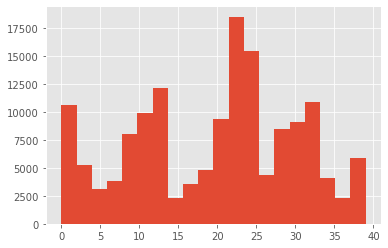

In [148]:
plt.hist(train_labels, bins=20)

In [149]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=4)

X_sm, y_sm = smote.fit_resample(train, train_labels)

(array([30948., 30948., 30948., 30948., 30948., 30948., 30948., 30948.,
        30948., 30948., 30948., 30948., 30948., 30948., 30948., 30948.,
        30948., 30948., 30948., 30948.]),
 array([ 0.  ,  1.95,  3.9 ,  5.85,  7.8 ,  9.75, 11.7 , 13.65, 15.6 ,
        17.55, 19.5 , 21.45, 23.4 , 25.35, 27.3 , 29.25, 31.2 , 33.15,
        35.1 , 37.05, 39.  ]),
 <a list of 20 Patch objects>)

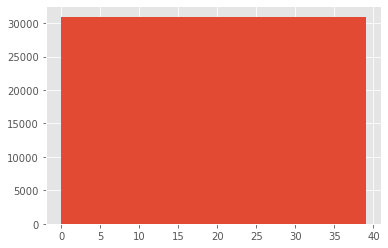

In [150]:
plt.hist(y_sm, bins=20)

In [151]:
smote2 = SMOTE('minority')

X_sm2, y_sm2 = smote2.fit_resample(train, train_labels)

/opt/conda/envs/rapids/lib/python3.6/site-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


(array([10618.,  5241.,  3102.,  3791.,  8036.,  9886., 12097., 16973.,
         3594.,  4801.,  9337., 18487., 15428.,  4350.,  8439.,  9048.,
        10835.,  4096.,  2271.,  5850.]),
 array([ 0.  ,  1.95,  3.9 ,  5.85,  7.8 ,  9.75, 11.7 , 13.65, 15.6 ,
        17.55, 19.5 , 21.45, 23.4 , 25.35, 27.3 , 29.25, 31.2 , 33.15,
        35.1 , 37.05, 39.  ]),
 <a list of 20 Patch objects>)

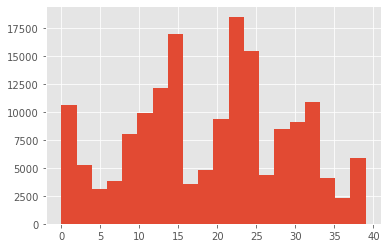

In [152]:
plt.hist(y_sm2, bins=20)

In [153]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100,
                               random_state=4,
                               max_features='sqrt',
                               n_jobs=-1, verbose=1)
model1.fit(train,train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=4,
                       verbose=1)

In [154]:
from sklearn.metrics import accuracy_score

predictions = model1.predict(test)

print("Accuracy: " + str(accuracy_score(test_labels, predictions)))

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.


Accuracy: 0.3159769637238022


[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.4s finished


In [155]:
model1.fit(X_sm,y_sm)

predictions2 = model1.predict(test)

accuracy_score(test_labels, predictions2)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.4s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.4s finished


0.27714777652437217

In [156]:
model1.fit(X_sm2,y_sm2)

predictions3 = model1.predict(test)

accuracy_score(test_labels, predictions3)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.8s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.4s finished


0.3144530863464545

In [157]:
importances = list(model1.feature_importances_)
feature_list = list(features.columns)
feature_importances = [(feature, importance) for feature, importance in zip(feature_list,importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances]

Variable: Place_Street - In vehicle                Importance: 0.07335359847618764
Variable: Place_Other/Unknown                      Importance: 0.061623580565749216
Variable: Place_Bank/S&L/Credit Union              Importance: 0.05767468799892425
Variable: Income                                   Importance: 0.04954573057325409
Variable: Public Transportation %                  Importance: 0.04850746830692489
Variable: Age                                      Importance: 0.0483436471049742
Variable: Pop                                      Importance: 0.04711365293713731
Variable: High School %                            Importance: 0.04676005437937724
Variable: Bachelors %                              Importance: 0.046110318695420066
Variable: Unemployed %                             Importance: 0.044946344009367076
Variable: Place_Residence - Driveway               Importance: 0.04454991613731976
Variable: Place_Bank - ATM                         Importance: 0.043292951874416126
V

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [158]:
top_features_list = []
top_importances = []

for x,y in feature_importances:
    if(y > 0.025):
        top_features_list.append(x)
        top_importances.append(y)
print(top_features_list)
print(top_importances)

['Place_Street - In vehicle', 'Place_Other/Unknown', 'Place_Bank/S&L/Credit Union', 'Income', 'Public Transportation %', 'Age', 'Pop', 'High School %', 'Bachelors %', 'Unemployed %', 'Place_Residence - Driveway', 'Place_Bank - ATM', 'Place_Retail - Department/Discount Store', 'Victims', 'Place_Residence - Single Family']
[0.07335359847618764, 0.061623580565749216, 0.05767468799892425, 0.04954573057325409, 0.04850746830692489, 0.0483436471049742, 0.04711365293713731, 0.04676005437937724, 0.046110318695420066, 0.044946344009367076, 0.04454991613731976, 0.043292951874416126, 0.028361264728419953, 0.027872092090463384, 0.025492755021516055]


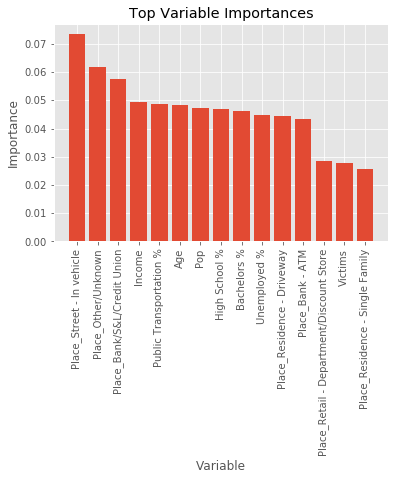

In [159]:
import matplotlib.pyplot as plt

x_values = list(range(len(top_importances)))
plt.bar(x_values, top_importances, orientation= 'vertical')
plt.xticks(x_values, top_features_list, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')
plt.show()

In [160]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig = plt.gcf()
    fig.set_size_inches(20,20)

Confusion matrix, without normalization


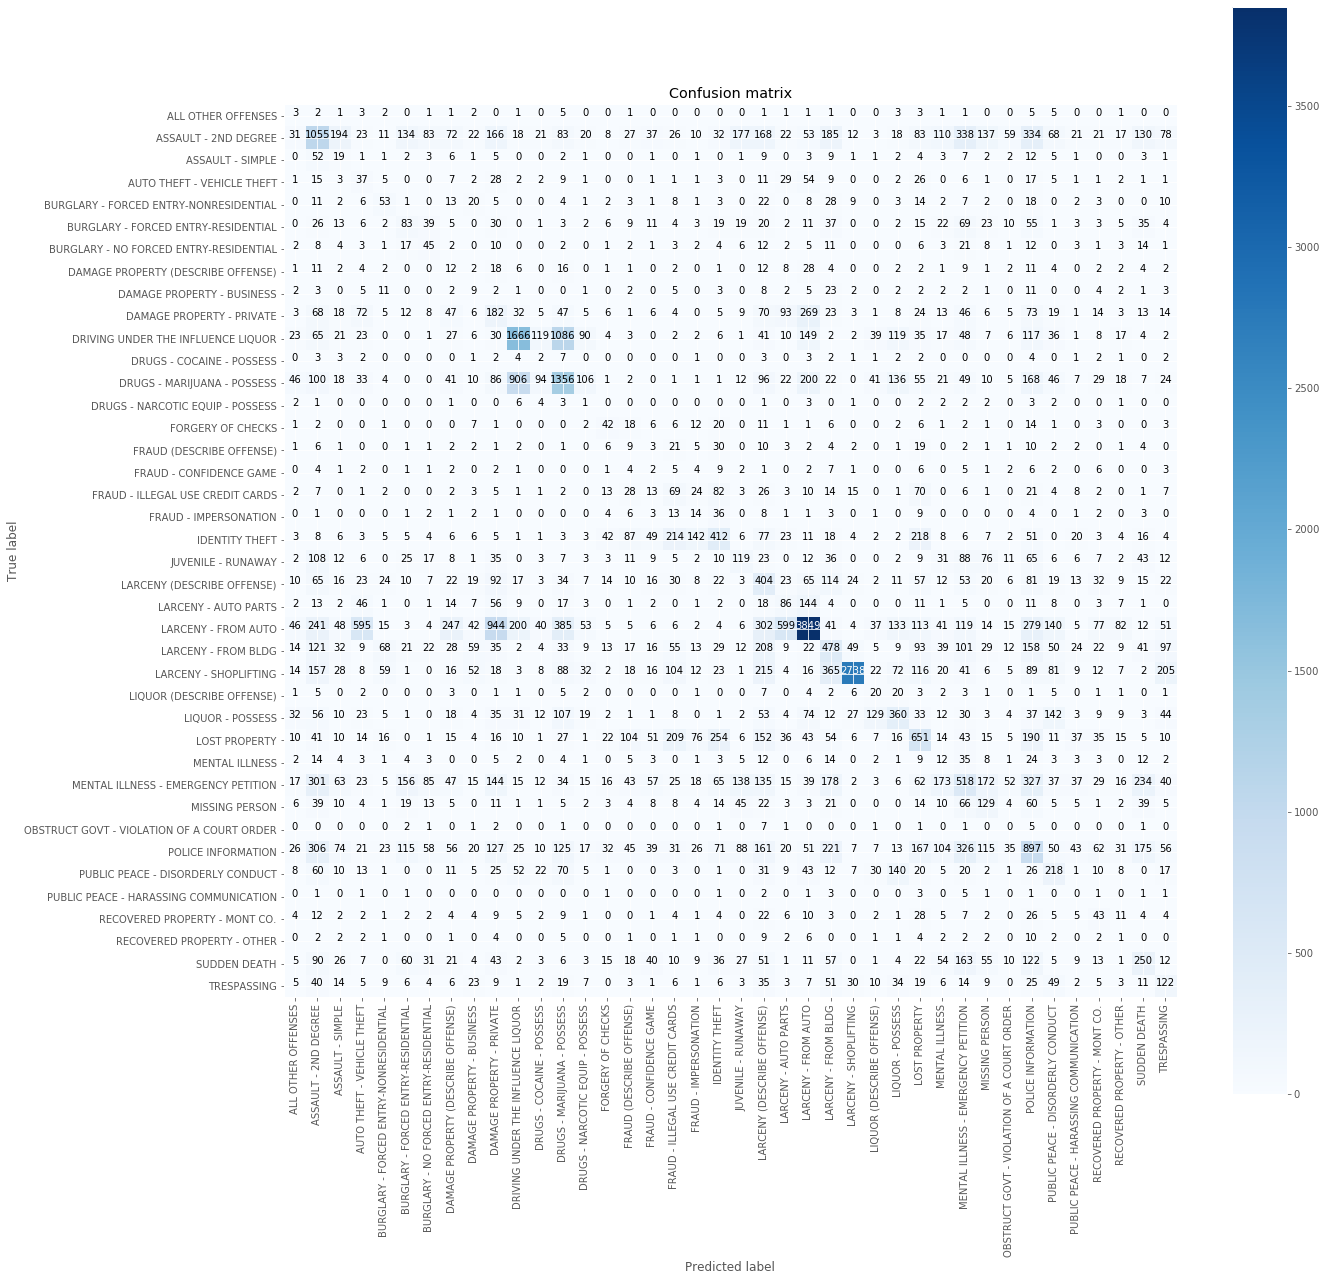

In [161]:
from sklearn.metrics import confusion_matrix

cfn_matrix = confusion_matrix(predictions, test_labels)

disp = plot_confusion_matrix(cfn_matrix, top_classes)

In [162]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model1, test, test_labels, n_repeats=2, random_state=4, n_jobs=-1)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.4s finished
/opt/conda/envs/rapids/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


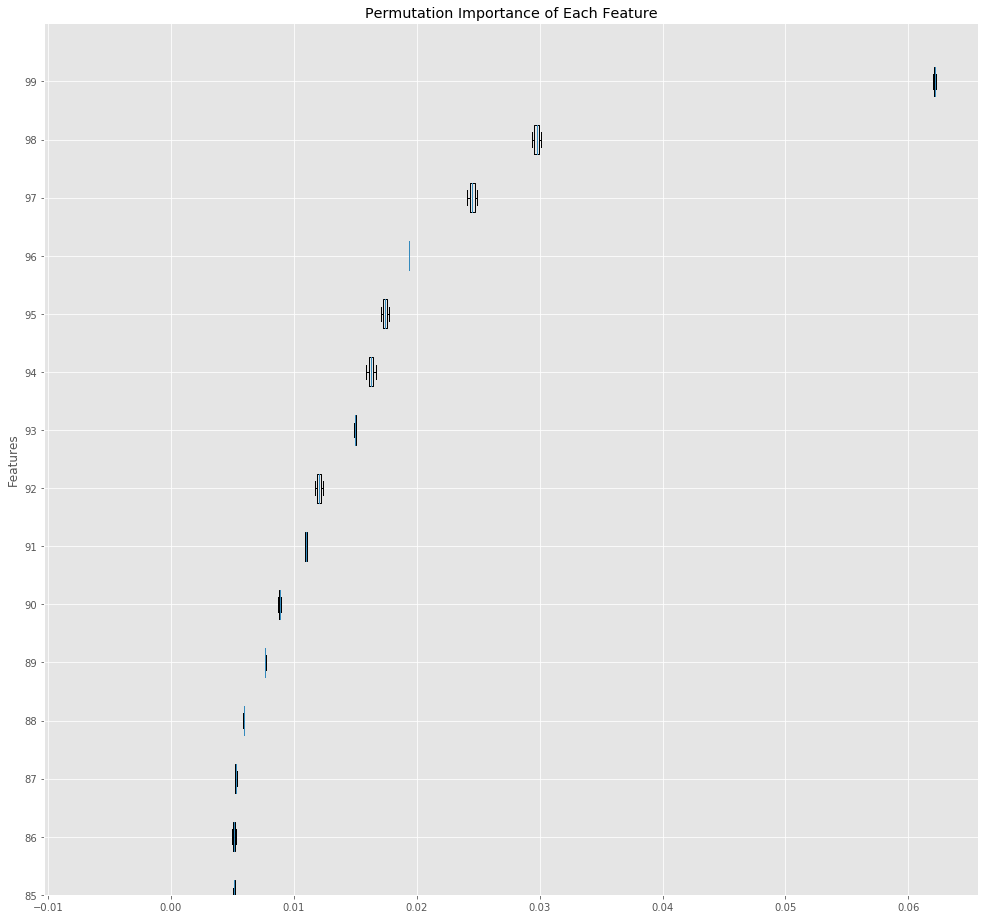

In [163]:
fig, ax = plt.subplots()
sorted_idx = result.importances_mean.argsort()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=range(train.shape[1]))
ax.set_title('Permutation Importance of Each Feature')
ax.set_ylabel('Features')
fig.tight_layout()
fig.set_size_inches(15,15)
plt.ylim((86,101))
plt.show()

In [164]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': np.linspace(10,200).astype(int),
    'max_depth': [None] + list(np.linspace(3,20).astype(int)),
    'max_features': ['auto','sqrt', None] + list(np.arange(0.5,1,0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10,50,500).astype(int)),
    'min_samples_split': [2,5,10],
    'bootstrap': [True,False]
}

estimator = RandomForestClassifier(random_state=4)

rs = RandomizedSearchCV(estimator, param_grid, n_jobs= -1,cv=3,
                       n_iter = 10, verbose = 1, random_state=4)

rs.fit(train, train_labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/conda/envs/rapids/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                      

In [165]:
print(rs.best_params_)

{'n_estimators': 91, 'min_samples_split': 10, 'max_leaf_nodes': 44, 'max_features': 'auto', 'max_depth': 12, 'bootstrap': True}


In [166]:
best_model = rs.best_estimator_

In [167]:
best_model.fit(train,train_labels)

RandomForestClassifier(max_depth=12, max_leaf_nodes=44, min_samples_split=10,
                       n_estimators=91, random_state=4)

In [168]:
predictions2 = best_model.predict(test)
accuracy_score(test_labels, predictions2)

/opt/conda/envs/rapids/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
importances2 = list(best_model.feature_importances_)
feature_list2 = list(features.columns)
feature_importances2 = [(feature, importance) for feature, importance in zip(feature_list2,importances2)]
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances2]

Variable: Place_Street - In vehicle                Importance: 0.224160860715501
Variable: Place_Residence - Driveway               Importance: 0.15396717004473146
Variable: Place_Other/Unknown                      Importance: 0.08855056122384784
Variable: Place_Retail - Department/Discount Store Importance: 0.08699566385339222
Variable: Victims                                  Importance: 0.07113004242174219
Variable: Place_Parking Lot - Residential          Importance: 0.05578122128085015
Variable: Place_Street - Residential               Importance: 0.04180712642882624
Variable: Place_Retail - Mall                      Importance: 0.029548228365633103
Variable: Place_Residence - Single Family          Importance: 0.029060976308987956
Variable: Place_Grocery/Supermarket                Importance: 0.027495013048573717
Variable: Place_Residence - Apartment/Condo        Importance: 0.020501962275547285
Variable: Place_Retail - Clothing                  Importance: 0.019941678029343417
V

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [171]:
top_importances2 = []
top_features_list2 = []

for x,y in feature_importances2:
    if(y > 0.025):
        top_features_list2.append(x)
        top_importances2.append(y)
top_features_list2

['Place_Street - In vehicle',
 'Place_Residence - Driveway',
 'Place_Other/Unknown',
 'Place_Retail - Department/Discount Store',
 'Victims',
 'Place_Parking Lot - Residential',
 'Place_Street - Residential',
 'Place_Retail - Mall',
 'Place_Residence - Single Family',
 'Place_Grocery/Supermarket']

Text(0.5, 1.0, 'Top Variable Importances')

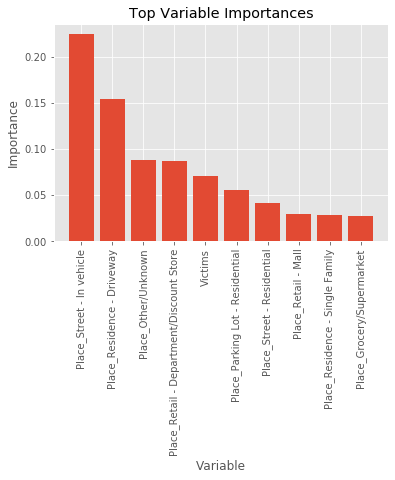

In [172]:
x_values2 = list(range(len(top_importances2)))
plt.bar(x_values2, top_importances2, orientation= 'vertical')
plt.xticks(x_values2, top_features_list2, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')

Confusion matrix, without normalization


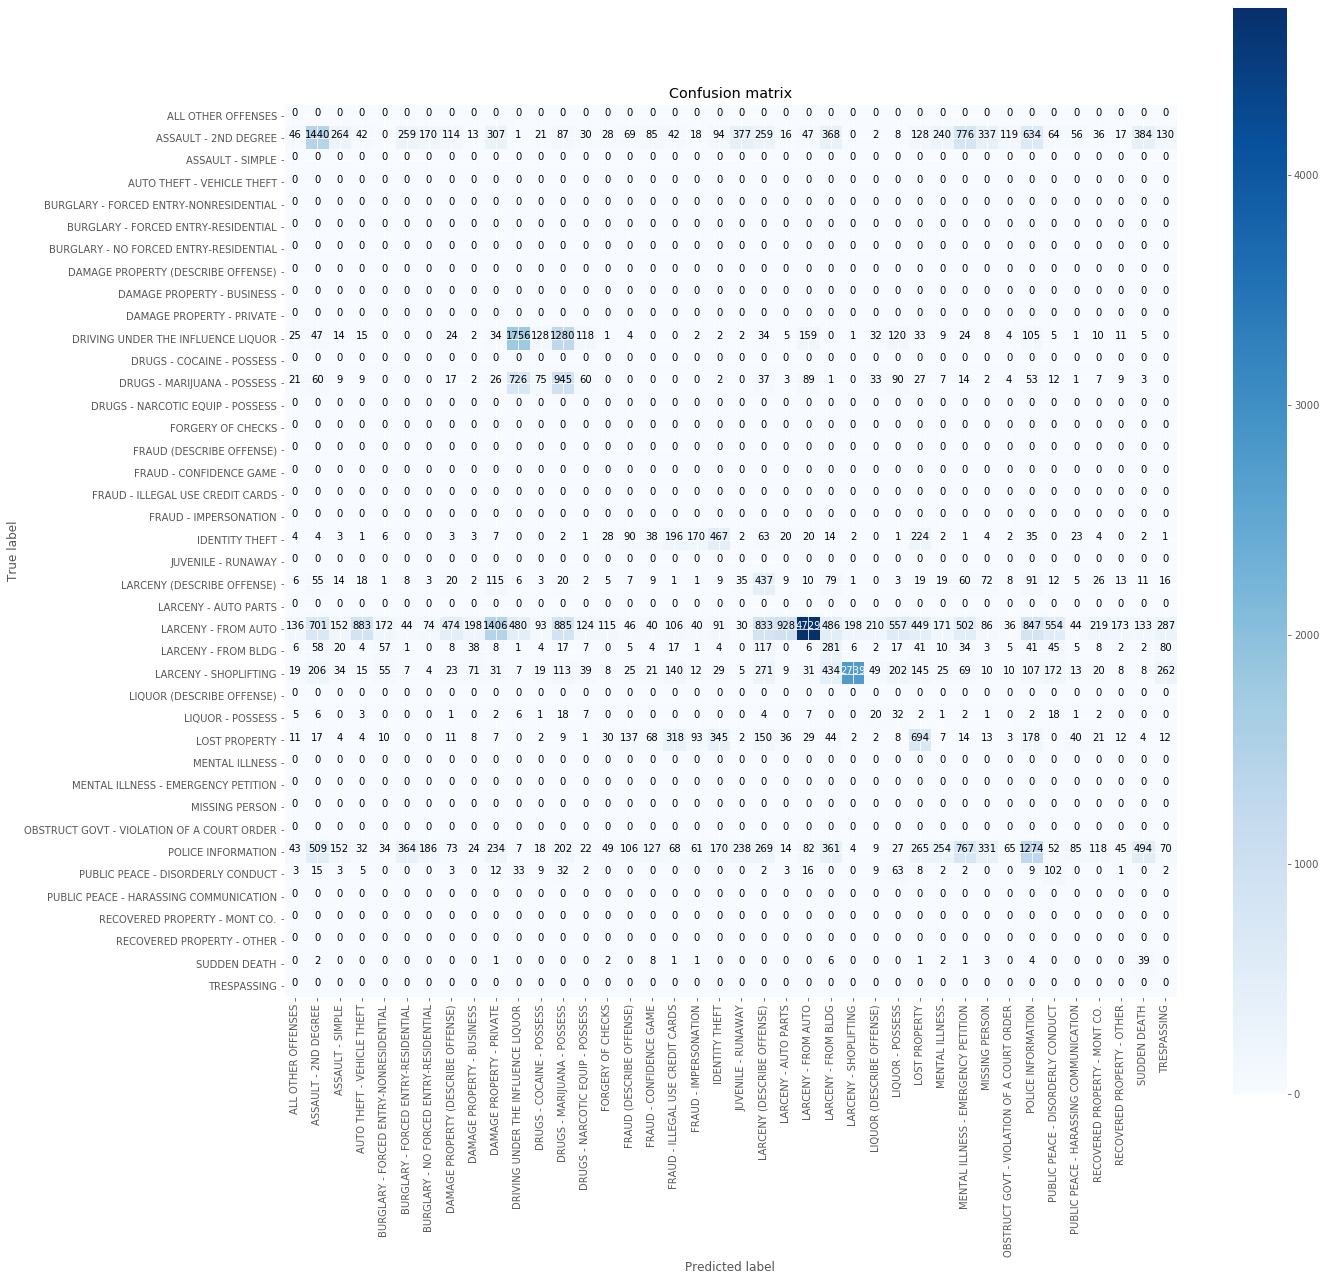

In [174]:
cfn_matrix2 = confusion_matrix(predictions2, test_labels)

disp2 = plot_confusion_matrix(cfn_matrix2, classes=top_classes)